#Import the required packages with their customary aliases as follows:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv..')

#How many rows and columns are in gdp_df? What are the data types of each column?

In [3]:
#Rows and Columns
print(gdp_df.shape)

(7662, 4)


In [4]:
#Data Types
print(gdp_df.dtypes)

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object


#Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [5]:
gdp_df.drop(gdp_df.columns[-1], axis=1, inplace=True)

In [6]:
print(gdp_df.dtypes)

Country or Area     object
Year                 int64
Value              float64
dtype: object


In [7]:
gdp_df = gdp_df.rename(columns={'Value': 'GDP_Per_Capita', 'Country or Area': 'Country', 'Year': 'Year'})

In [8]:
print(gdp_df.dtypes)

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object


#How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [9]:
country_years = gdp_df.groupby(["Country"])["Year"].count()

In [10]:
print(country_years)

Country
Afghanistan                    20
Africa Eastern and Southern    33
Africa Western and Central     33
Albania                        33
Algeria                        33
                               ..
Viet Nam                       33
West Bank and Gaza             29
World                          33
Zambia                         33
Zimbabwe                       33
Name: Year, Length: 242, dtype: int64


242 countries total.

In [11]:
unique_years = gdp_df["Year"].nunique()

In [12]:
print(unique_years)

33


In [13]:
country_complete = gdp_df.groupby("Country").filter(lambda x: x.Year.count() == unique_years)

In [14]:
print(country_complete.nunique())

Country            202
Year                33
GDP_Per_Capita    6628
dtype: int64


202 countries with all years.

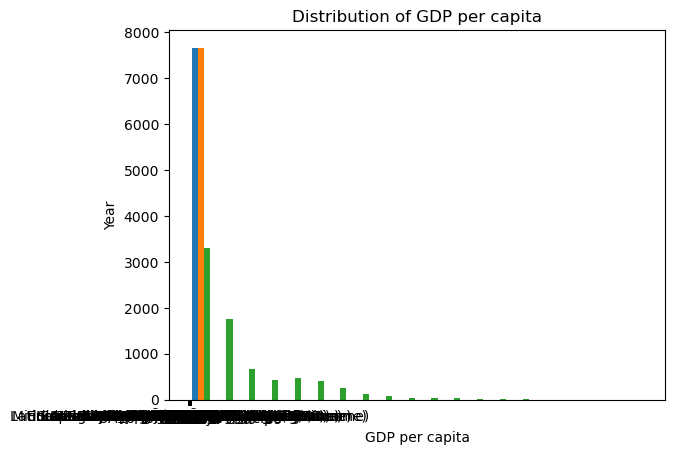

In [15]:
# Create a histogram
plt.hist(gdp_df, bins=20)
plt.xlabel('GDP per capita')
plt.ylabel('Year')
plt.title('Distribution of GDP per capita')
plt.show()

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

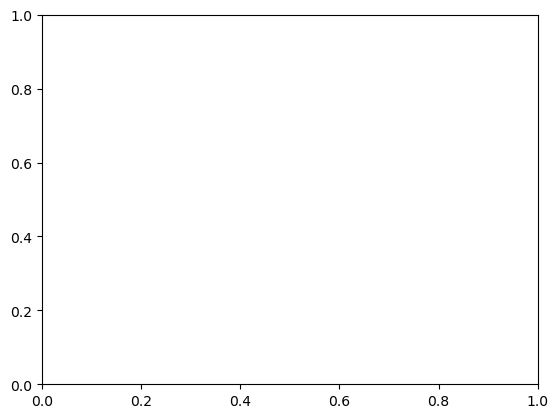

In [16]:
# Create the boxplot
plt.boxplot(gdp_df.values, labels=gdp_df.columns)
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Boxplot of Variables in GDP DataFrame')
plt.show()

In [ ]:
# Create a violin plot
sns.violinplot(x="species", y="sepal_length", data=gdp_df)
plt.xlabel('Species')
plt.ylabel('Sepal Length')
plt.title('Violin Plot of Sepal Length by Species')
plt.show()